# Premiers travaux pratiques de Connaissances Probabilistes pour l'Intelligence artificielle 



                                                                                     YIBOE OSSEE JOSEPHA CHARLESIA
                                                                                     MS IA
                                                                                     TÉLÉCOM PARIS 
                                                                                     PROMO 2022-2023
À rendre le Lundi 10 Octobre 2022

## Une première idée des enjeux du problème


On considère un signal ne pouvant prendre que deux valeurs distinctes 𝜔1 et 𝜔2 et on
suppose que ce signal est transmis à un destinataire distant par le biais d'un canal de
transmission. L'ensemble des perturbations agissant sur ce canal est modélisé par une
variable aléatoire gaussienne de telle sorte que lorsque 𝜔1 (resp. 𝜔2) est transmis, on
observe, au niveau du récepteur, une variable aléatoire gaussienne de moyenne m1 (resp.
m2) et d'écart-type sig1 (resp. sig2).
Pour modéliser le problème on considère donc deux processus aléatoires 𝑿 = (𝑋𝑠
)𝑠∈𝑆 et𝒀 = (𝑌𝑠)𝑠∈𝑆

. Pour tout 𝑠 ∈ 𝑆, 𝑋𝑠 prend ses valeurs dans l'espace fini des classes Ω =
{𝜔1, 𝜔2} et 𝑌𝑠 dans ℝ. Les réalisations de 𝑿 sont inobservables et le problème de la
segmentation est celui de l'estimation de 𝑿 = 𝒙 = (𝑥𝑠)𝑠∈𝑆 à partir de l'observation 𝒀 =𝒚 = (𝑦𝑠)𝑠∈𝑆
, i.e. le signal numérique à segmenter. On s'intéresse ici au cas où les couples
(𝑋𝑠, 𝑌𝑠) sont indépendants (modélisation la plus simple). En réception, la stratégie de
décision 𝑠̂consiste à choisir la classe 𝜔1 ou 𝜔2 pour laquelle la densité de probabilité de
l'observation est la plus grande (règle du maximum de vraisemblance) :
𝑠̂(𝒚) = 𝜔𝑖 𝑠𝑖 𝑝(𝒚|𝜔𝑖) = max 𝑖∈{1,2} 𝑝(𝒚|𝜔𝑖)

0. Le langage de programmation conseillé pour ce TP est python 3 (vous pouvez en
choisir un autre, mais cela peut compliquer les choses). Il vous faut alors
télécharger une version de python 3, puis installer les packages suivants : « numpy
», « scipy », et « matplotlib » à l’aide des commandes « pip install numpy »
, « pip install scipy » et « pip install matplotlib ».

In [20]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

## Exercice 1

1.  On souhaite écrire le script premiere_idee_MV.py réalisant les opérations
précédemment décrites et calculant le taux d'erreur obtenu. Pour cela on
respectera les étapes suivantes :


a. Ecrire la fonction

bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)qui bruite le
vecteur X avec un bruit gaussien indépendant de moyenne m1 (resp. m2) et
d'écart type sig1 (resp. sig2) pour la classe cl1 (resp. cl2). L'écriture
cl1 (resp. cl2) fait référence à 𝜔1 (resp. 𝜔2) lorsque nous sommes dans
le contexte de la programmation.

b. Ecrire la fonction

classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2) permettant
de construire le signal segmenté S en classant les données du signal bruité
Y dans les classes cl1 et cl2 suivant le critère précédent (on pourra utiliser
la fonction norm.pdf qui se trouve dans scipy.stats).

c. Ecrire le script premiere_idee_MV.py dans lequel on acquiert le signal
𝑿 par np.load("signal.npy"). Le fichier signal.npy, ainsi que tous
les autres signaux utilisés plus loin, sont fournis dans le dossier
signaux.zip. On bruite alors le signal avec un bruit gaussien, puis on
segmente le signal bruité suivant le critère précédent et enfin on affiche sur 
un même graphique les courbes du signal original, du signal bruité et du
signal segmenté.

Remarque : Pour récupérer directement les valeurs des classes dans le signal, on
pourra inclure dans le script premiere_idee_MV.py le code suivant :
cl = np.unique(X) et cl1=cl[0], cl2=cl[1].

In [21]:
#a. Ecrire la fonction bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)

def bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2):
    res =[]
    #noise = , X.shape)
    for i in range(len(X)):
        
        if X[i]==cl1:
            res.append(np.random.normal(m1, sig1))

        else :
            if X[i]==cl2:
                res.append(np.random.normal(m2, sig2))
            
    return res


In [22]:
#b. Ecrire la fonction classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2) 

from scipy import stats

def classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2):

    S1=stats.norm.pdf(Y, loc=m1, scale=sig1)

    S2=stats.norm.pdf(Y, loc=m2, scale=sig2)

    return list(zip(S1,S2))



In [23]:
#c. Ecrire le script premiere_idee_MV.py 

X=np.load("signal.npy")
print(X.shape)
cl = np.unique(X)

m1=127
sig1=1
m2=128
sig2=1

cl1=cl[0]
cl2=cl[1]
classe=[]            

def premiere_idee_MV(X,cl1,cl2,m1,sig1,m2,sig2):

    Y=bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
    A=classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2)

    S=[]
    for couple in A:
        if couple[0]>couple[1]:
            S.append(cl1)
        else:
            S.append(cl2)
    erreur=taux_erreur(X,S)
    return erreur

(50,)



2. Ecrire la fonction taux_erreur(A,B) qui calcule et affiche le taux de signaux
différents entre A et B et l'intégrer dans premiere_idee_MV.py pour calculer
le taux d'erreur de segmentation.

In [24]:
def taux_erreur(A,B):
    cnt=0
    for i in range(len(A)):
        if A[i]!=B[i]:
            cnt+=1
    #print(cnt,len(A))
    return (cnt/len(A))*100

3. Afin de mesurer statistiquement l'erreur, il est nécessaire de moyenner celle-ci sur un grand nombre, T, de versions bruitées du même signal, simulées à paramètres constants.

a. Programmer le calcul de cette erreur moyenne et tracer son évolution au cours des itérations successives.

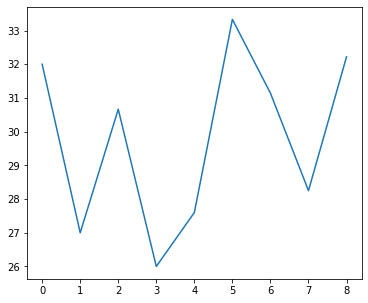

In [25]:
evolution=[]
X=np.load("signal.npy")


### Insertion de la fonction taux d'erreur dans le script premiere_idee_MV


def premiere_moyenne(X,cl1,cl2,m1,sig1,m2,sig2,t):
    liste=[]
    for k in range(t):
        Y=bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        A=classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2)
        S=[]
        for couple in A:
            if couple[0]>couple[1]:
                S.append(cl1)
            else:
                S.append(cl2)
        #print(S)
        erreur=taux_erreur(X,S)
        #print(erreur)
 
        liste.append(erreur)
    return np.mean(liste)


    
### Répétition pour N=1000 itérations



for i in range(1,1000):
    
    cl = np.unique(X)
    cl1=cl[0]
    cl2=cl[1]
    val=premiere_moyenne(X,cl1,cl2,m1,sig1,m2,sig2,i)
    
    ## Récupération du taux d'erreur (ajout dans la liste evolution)
    evolution.append(val)

### Affichage graphique

plt.figure(figsize= (6,5))
plt.plot(evolution)


b. Que constate-t-on lorsque T devient très grand ?

On constate que lorsque T devient très grand, la complexité de l'algorithme élevée est très élévée (plus de temps de calcul) et que les valeurs de taux d'erreur moyens de notre stratégie de classification convergent.


c. Comment expliquer ce phénomène ?


Cela revient à dire que lorsque T devient très grand,$\textbf{l'espérance des erreurs moyennes devient déterministe et cela se justifie par la Loi des grands nombres.}$ 

En effet, d'après la Loi des grands nombres,$\textbf{ lorsqu’un phénomène modélisé par $(($$\omega$$), A,P)$ se reproduit n fois de manière indépendante en donnant $($$\omega_1$$, …,$$\omega_n$$)$ alors (cette convergence est appelée « loi des grands nombres »)}$



d. Comment l'interpréter en termes de niveau de bruit ?

Dans le cadre de cette expérience, pour ce bruit,le taux d'erreur moyen de notre stratégie
de classification est très proche de zéro. 
Nous classerons notre bruit comme n'impactant pas considérablement le signal.

Nous pouvons déduire $$\textbf{qu'il s'agit d'un bruit de niveau faible puisque que notre
taux d'erreur moyen, comparant notre signal d'origine et notre signal segmenté, converge vers une valeur très faible.}$$

4.
Répétons la meme expérience pour tous les signaux et pour tous les bruits

In [26]:
m1=[120,127,127,127,127]
m2=[130,127,128,128,128]
sig1=[1,1,1,0.1,2]
sig2=[2,5,1,0.1,3]

dataf=["signal.npy","signal1.npy","signal2.npy","signal3.npy","signal4.npy","signal5.npy"]
my_index = ['Bruit1','Bruit2','Bruit3','Bruit4','Bruit5']
mat1=np.zeros((5,6))
import pandas as pd


#work(m1,sig1,m2,sig2)
def method1(dataf,index,mat1,m1,sig1,m2,sig2):
    
    for i, file in enumerate(dataf):
        #print(i)
        #l=
        f=np.load(file)
        #print(f)
        cl = np.unique(f)
        cl1=cl[0]
        cl2=cl[1]
        for j in range(len(m1)):
            #print(j)
            evolution=[]
            for p in range(1,1000):
                val=premiere_moyenne(f,cl1,cl2,m1[j],sig1[j],m2[j],sig2[j],p)

                evolution.append(val)
            value=np.mean(evolution)
            #print(value)
            mat1[j][i]=value.round(2)

    columns = dataf
    df = pd.DataFrame(data=mat1,index=my_index,columns=columns)
    #print(df)
    return df
method1(dataf,my_index,mat1,m1,sig1,m2,sig2)

,signal.npy,signal1.npy,signal2.npy,signal3.npy,signal4.npy,signal5.npy
Bruit1,0.06,0.02,0.04,0.04,0.04,0.04
Bruit2,18.27,18.00,17.61,17.71,17.65,17.63
Bruit3,31.31,30.10,30.90,30.87,30.86,30.82
Bruit4,0.00,0.00,0.00,0.00,0.00,0.00
Bruit5,42.71,38.46,38.09,38.17,38.13,38.03


Comparaisons et commentaires:
On remarque à partir du tableau que les taux d'erreur moyen des bruits $1$ et $4$ sont tous les deux très proches de $0$. 
Nous pouvons donc déduire que ces bruits sont dans le cadre de cette expérience très faibles car notre stratégie de classification reussit à retrouver le signal d'origine avec pratiquement pas d'erreurs (valeurs entre $0,00$% et $0,04$%; (inversement pour les bruits $2$, $3$ et $5$ qui sont des bruits forts).

****************


Le $Bruit_1$ est faible avec des moyennes $\mu_1$ et $\mu_2$ éloignées et des variances élévées.

Mais le $Bruit_4$ est faible avec des moyennes très proches et des variances $\sigma_1^2$ et $\sigma_2^2$ très petites.

Le $Bruit_2$ est fort avec des moyennes $\mu_1$ et $\mu_2$ identiques et deux variances $\sigma_1^2$ et $\sigma_2^2$ élevées.

Le $Bruit_3$ est fort avec des moyennes $\mu_1$ et $\mu_2$ très proches et des variances assez grandes.


Le $Bruit_5$ est fort avec des variances $\sigma_1^2$ et $\sigma_2^2$ très grandes et des moyennes $\mu_1$ et $\mu_2$ très proches.

On en conclut qu'un bruit est fort lorsque les valeurs des variances $\sigma_1^2$ et $\sigma_2^2$ sont grandes sauf pour le cas dans lequel les moyennes $\mu_1$ et $\mu_2$ sont éloignées.

Et un bruit sera considéré comme étant faible si les moyennes $\mu_1$ et $\mu_2$ sont éloignées avec des variances $\sigma_1^2$ et $\sigma_2^2$ grandes ou si les moyennes $\mu_1$ et $\mu_2$ sont proches avec des variances $\sigma_1^2$ et $\sigma_2^2$ très petites.

## Apport des méthodes bayésiennes de segmentation

1. Programmer le script MAP_MPM2.py en s'inspirant du script précédent. Pour cela
on écrira les fonctions :

a. [p1,p2] = calc_probaprio2(X,cl1,cl2) qui calcule la loi du
processus 𝑿 a priori à partir du signal d'origine 𝑿.



Calcul des probabilités à priori $P($$\omega_1)$ et $P($$\omega_2)$ 

In [27]:
#1.a

X=np.load("signal.npy")
cl = np.unique(X)
cl1=cl[0]
cl2=cl[1]

def calc_probaprio(X,cl1,cl2):
    #X=np.load("signal1.npy")

    c1=0
    c2=0
    for i in range(len(X)):
        if X[i]==cl1:
            c1+=1
        else:
            c2+=1
    return list(((c1/len(X)),(c2/len(X))))
                
pro=calc_probaprio(X,cl1,cl2)
print(pro)

[0.36, 0.64]


b. MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2) qui classe les
éléments du signal bruité 𝒀 suivant le critère du MAP.


Calcul des probabilités des lois de X conditionnelles à Y:

$P$$($$\omega_1$$|$$y$$)$ $=$ $P$$($$\omega_1$$)$ $*$ $P$ $($$y$ $|$ $\omega_1$$)$

$P($$\omega_2$$| y) = P($$\omega_2$$) * P (y | $$\omega_2$$)$

In [28]:
#1.b


X=np.load("signal1.npy")
cl = np.unique(X)
cl1=cl[0]
cl2=cl[1]

m1=120
sig1=1
m2=130
sig2=2

pro=calc_probaprio(X,cl1,cl2)

p1=pro[0]
p2=pro[1]

Y=bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)

def MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2):
    A=classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2)
    S=[]
    for i in range(len(Y)):
        
        if p1*A[i][0] >= p2*A[i][1]:
            S.append(cl1)
        elif p2*A[i][1] >= p1*A[i][0]:
            S.append(cl2)
    return S
            
#MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)

2. Tester la méthode avec les mêmes signaux et les mêmes bruits que
précédemment. Présenter les résultats dans un tableau. Comparer et
commenter.

In [41]:
# 2.

data=["signal.npy","signal1.npy","signal2.npy","signal3.npy","signal4.npy","signal5.npy"]
index = ['Bruit1','Bruit2','Bruit3','Bruit4','Bruit5']
mat2=np.ones((5,6))

m1=[120,127,127,127,127]
m2=[130,127,128,128,128]
sig1=[1,1,1,0.1,2]
sig2=[2,5,1,0.1,3]

def premiere_moyenne2(X,cl1,cl2,m1,sig1,m2,sig2,t):
    liste=[]
    for k in range(t):
        pro=calc_probaprio(X,cl1,cl2)
        p1=pro[0]
        p2=pro[1]
        
        Y=bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        S=MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)

        erreur=taux_erreur(X,S)
 
        liste.append(erreur)
    return np.mean(liste)

def method2(data,index,mat2,m1,sig1,m2,sig2):
    for i,file in enumerate(data):
        f=np.load(file)
        cl = np.unique(f)
        cl1=cl[0]
        cl2=cl[1]
        for j in range(len(m1)):
            evolution=[]
            for p in range(1,1000):
                val=premiere_moyenne2(f,cl1,cl2,m1[j],sig1[j],m2[j],sig2[j],p)
                #print(val)
                evolution.append(val)
            value=np.mean(evolution)
            #print(value)
            mat2[j][i]=value
        columns = data
    
    df = pd.DataFrame(data=mat2,index=index,columns=columns)

    return df

method2(data,index,mat2,m1,sig1,m2,sig2)

,signal.npy,signal1.npy,signal2.npy,signal3.npy,signal4.npy,signal5.npy
Bruit1,0.088889,0.037460,0.040965,0.040939,0.039409,0.039335
Bruit2,21.089242,17.537425,17.621646,17.670211,17.701481,17.570729
Bruit3,26.840917,30.955079,30.934465,30.859552,30.784282,30.805504
Bruit4,0.000000,0.000000,0.000025,0.000056,0.000000,0.000000
Bruit5,36.000000,38.138060,38.079555,38.152331,38.156813,38.056620


Comparaisons et commentaires:

 Cette méthode conjugue les probabilités à priori de X (utilisées dans la méthode 1),à celle des lois de probabilités de X conditionnelles à Y pour obtenir la loi de probabilité du couple (signal d'origine,signal segmenté), d'après la formule de bayes :

$P$$($$\omega_1$$|$$y$$)$ $=$ $P$$($$\omega_1$$)$ $*$ $P$ $($$y$ $|$ $\omega_1$$)$

$P($$\omega_2$$| y) = P($$\omega_2$$) * P (y | $$\omega_2$$)$ 

pour la construction du signal segmenté. 

On remarque à partir du tableau que, comme dans l'expérience précédente, les taux d'erreur moyen des bruits $1$ et $4$ sont tous les deux très proches de $0$. 
Nous pouvons donc déduire que ces bruits sont, dans le cadre de cette expérience, très faibles car notre stratégie de classification réussit à retrouver le signal d'origine avec pratiquement pas d'erreurs (valeurs entre $0,00$% et $0,04$%; (inversement pour les bruits $2$, $3$ et $5$ qui sont des bruits forts).

Nous remarquons cependant que les valeurs de taux d'erreur moyen dans les deux cas, sont quasimment identiques(surtout pour les signaux s1 à s5);

On remarque et on déduit que la stratégie de classification bayésienne, dans ce cas, a les memes performances que la première méthode et on remarque cela surtout aux niveau des signaux ou la distribution des ($\omega_1$) et ($\omega_2$) est quasiment égale :

(0.36 , 0.64),
(0.492 , 0.508),
(0.50106 , 0.49894),
(0.49778 , 0.5022),
(0.49854 , 0.50146), et
(0.50126 , 049874).

3. Ecrire la fonction simul2(N,cl1,cl2,p1,p2) qui simule un signal de taille
N dont les composantes sont indépendantes et prennent les valeurs cl1 et cl2
avec les probabilités respectives p1 et p2.

In [ ]:
# 3.
import random

def simul2(N,cl1,cl2,p1,p2):
    
    return(random.choices((cl1,cl2), weights = [p1,p2], k = N))
#simul2(50,cl1,cl2,p1,p2) 

4. Comparer et commenter les résultats obtenus en segmentant, avec les deux
méthodes et les bruits de la question I.4, cinq signaux simulés avec simul2 en
faisant varier p1 et p2 ( 5 × 5 cas différents à segmenter un grand nombre de fois
par chaque méthode).


In [31]:
# 4.
data1=["s1.npy","s2.npy","s3.npy","s4.npy","s5.npy"]

mat1=np.ones((5,5))
mat2=np.ones((5,5))

### Simulation des 5 signaux


np.save('s1.npy', simul2(50,cl1,cl2,0.1,0.9))
np.save('s2.npy', simul2(50,cl1,cl2,0.3,0.7))
np.save('s3.npy', simul2(50,cl1,cl2,0.5,0.5))
np.save('s4.npy', simul2(50,cl1,cl2,0.7,0.3))
np.save('s5.npy', simul2(50,cl1,cl2,0.9,0.1))

### Première méthode

def method11(data1,index,mat1,m1,sig1,m2,sig2):
    for i,element in enumerate(data1):
        f=np.load(element)
        cl = np.unique(f)
        cl1=cl[0]
        cl2=cl[1]
        classe=[]
        for j in range(len(m1)):
            evolution=[]
            for p in range(1,1000):
                val=premiere_moyenne(f,cl1,cl2,m1[j],sig1[j],m2[j],sig2[j],p)
                evolution.append(val)
            value=np.mean(evolution)
            #print(value)
            mat1[j][i]=value
    columns = ["s1m1","s2m1","s3m1","s4m1","s5m1"]
    df = pd.DataFrame(data=mat1,index=index,columns=columns)
    #print(df)
    return df
    
### Deuxième méthode

def method22(data1,index,mat2,m1,sig1,m2,sig2):
    for i,element in enumerate(data1):
        f=np.load(element)
        cl = np.unique(f)
        cl1=cl[0]
        cl2=cl[1]
        for j in range(len(m1)):
            evolution=[]
            for p in range(1,1000):
                val=premiere_moyenne2(f,cl1,cl2,m1[j],sig1[j],m2[j],sig2[j],p)
                evolution.append(val)
            value=np.mean(evolution)
            #print(value)
            mat2[j][i]=value
        columns = ["s1m2","s2m2","s3m2","s4m2","s5m2"]
    df = pd.DataFrame(data=mat2,index=index,columns=columns)
        #print(df)
    return df

# Génération des tableaux

def final(data1,index,mat1,mat2,m1,sig1,m2,sig2):
    df1=pd.DataFrame()
    df2=pd.DataFrame()

    df1=method11(data1,index,mat1,m1,sig1,m2,sig2)
    df2=method22(data1,index,mat2,m1,sig1,m2,sig2)
    fusion=pd.concat([df1, df2], axis = 1) 
    return fusion

final(data1,index,mat1,mat2,m1,sig1,m2,sig2)

,s1m1,s2m1,s3m1,s4m1,s5m1,s1m2,s2m2,s3m2,s4m2,s5m2
Bruit1,0.044444,0.055556,0.031746,0.000000,0.000000,0.024691,0.031746,0.000000,0.000000,0.000000
Bruit2,23.660582,26.093474,14.523986,10.044709,7.256173,10.000000,18.206702,11.373192,9.895767,1.869665
Bruit3,32.867108,30.952293,31.590653,29.663757,30.398148,9.642328,18.885802,26.478660,21.799383,4.000000
Bruit4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bruit5,51.909877,45.825838,31.664550,28.411993,23.101058,10.000000,22.000000,24.794004,23.446473,3.746032


Comparaisons et commentaires:

1. 
Au premier abord, on observe, comme dans la question précédente, la meme distribution de taux d'erreur moyen que précédemment pour chaque bruit, ce qui permet de confirmer encore une fois, leur niveaux (faible ou fort).

2. 
On constate,cependant que les résultats sont beaucoup plus satisfaisants avec la méthode de classification bayésienne, dans cette nouvelle expérience.

En effet une comparaison des résultats des deux méthodes, permet de déduire que les taux d'erreur moyen sont indiscutablement toujours plus faibles pour la méthode de classification bayésienne, surtout pour les signaux s1,s2,s4 et s5 (de loi de probabilités à priori pour ($\omega_1$) et ($\omega_2$) :

(0.1 , 0.9),
(0.3 , 0.7),
(0.7 , 0.3),
(0.9 , 0.1)).

Cela vient conforter les déductions de la question 2. et permet donc de relier les résultats plus satisfaisants de performance de la méthode de classification bayésienne à la distribution plus inégale des classes ($\omega_1$) et ($\omega_2$). 

Dans ces cas de distribution, la formule de Bayes permet donc de faire une différence significative, comparée à la première méthode.
****